# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle, pprint, csv

# TODO: Fill this in based on where you saved the training and testing data

training_file ='./traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    #pprint.pprint(train)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Load signname.csv
signname = {}
with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        signname[int(row[0])]= row[1]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

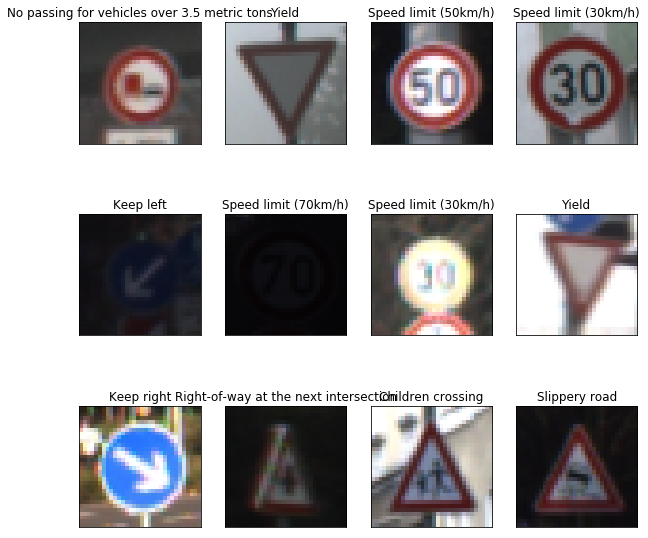

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plotting traffic sign images
fig, sign = plt.subplots(nrows=3, ncols=4, figsize=(10,10));
sign = sign.ravel() #Return a contiguous flattened array.

for i in range(len(sign)):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    sign[i-1].imshow(image)
    sign[i-1].set_title(signname[y_train[index]])
    sign[i-1].axes.get_xaxis().set_visible(False)
    sign[i-1].axes.get_yaxis().set_visible(False)

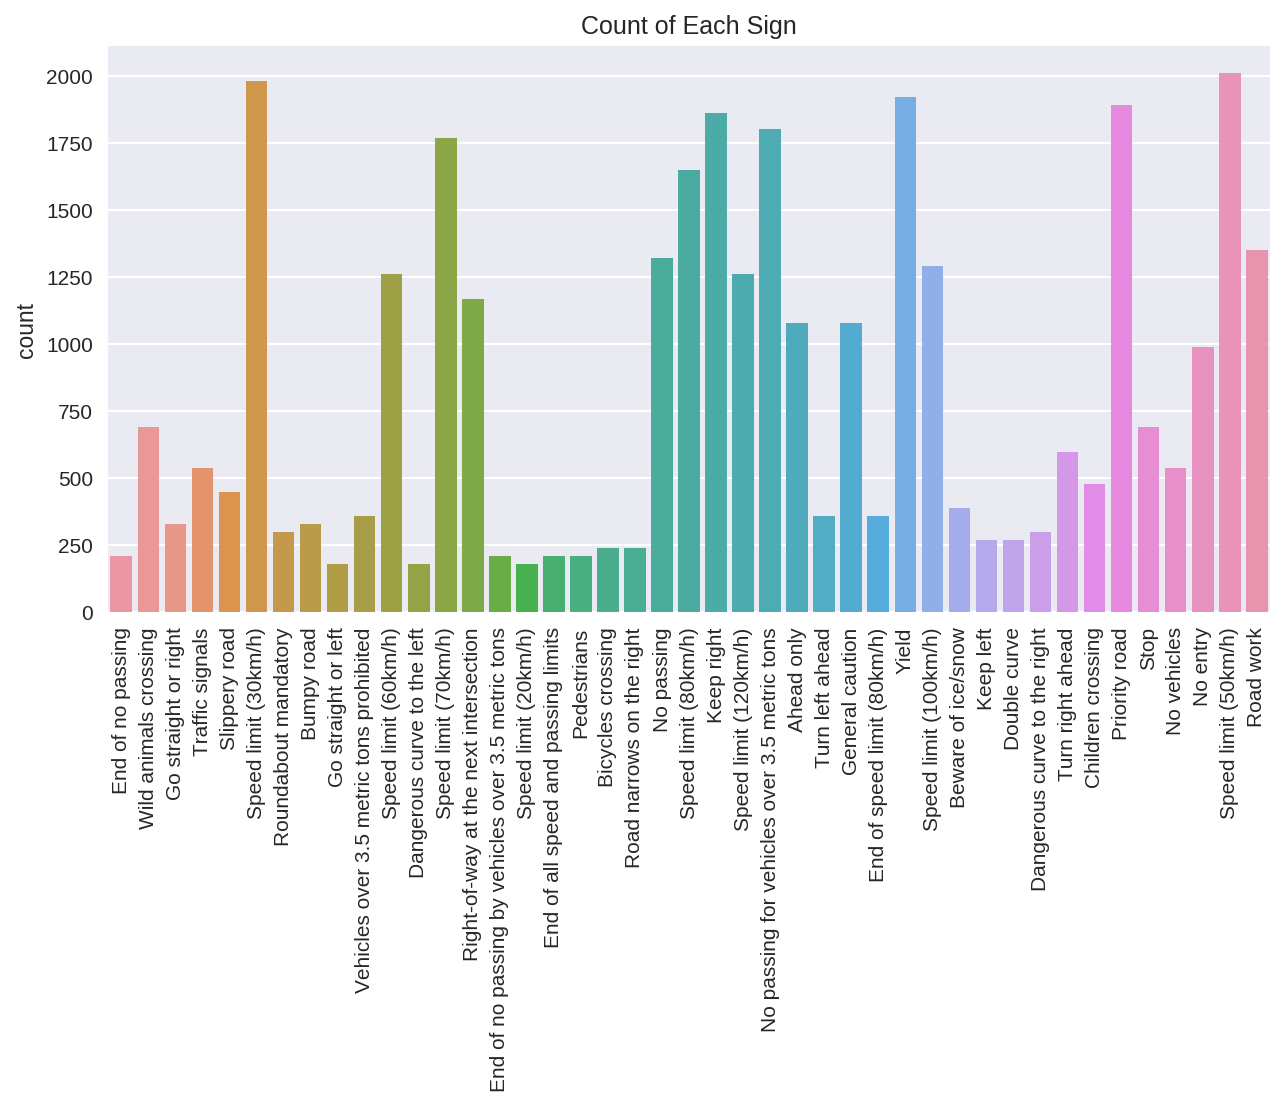

In [4]:
# plotting the count of each sign
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame

signs_train = DataFrame(Series(y_train),columns = ['id'])
signs_label = DataFrame(Series(signname))
signs_label.reset_index(level=0, inplace=True)
signs_label.columns = ['id', 'Label']
signs_train_label = pd.merge(signs_train,signs_label)
 
fig, ax = plt.subplots(1, 1, figsize = (10,5), dpi=150)
sns.countplot(x="Label", data=signs_train_label)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.title("Count of Each Sign")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Normalizing the data dimensions so that they are of approximately the same scale.Zero Mean as possible so that the optimizer can have it easily to decrease the variance in its job.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(samples):
    """Normalize data"""
    return (samples - samples.mean()) / (np.max(samples) - np.min(samples))

X_train = normalize(X_train)
X_test = normalize(X_test)
X_validation = normalize(X_validation)

#original is uint8 so recast the arrays to a dtype which supports float
#X_train = (X_train.astype(float) - pixel_depth) / pixel_depth 
print("X_train")
print('Mean:', np.mean(X_train))
print('Standard deviation:', np.std(X_train))
print()
#X_test = (X_test.astype(float) - pixel_depth) / pixel_depth
print("X_test")
print('Mean:', np.mean(X_test))
print('Standard deviation:', np.std(X_test))
print()
#X_validation = (X_validation.astype(float) - pixel_depth) / pixel_depth
print("X_validation")
print('Mean:', np.mean(X_validation))
print('Standard deviation:', np.std(X_validation))


X_train
Mean: -2.22061620326e-17
Standard deviation: 0.266081915397

X_test
Mean: 1.89959774839e-17
Standard deviation: 0.26958466437

X_validation
Mean: 8.97912801473e-19
Standard deviation: 0.274069461276


In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print("Training set total images ",len(X_train))
print("Test set total images ",len(X_test))
print("Validation set total images ",len(X_validation))


Training set total images  34799
Test set total images  12630
Validation set total images  4410


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 20 # before 14
BATCH_SIZE = 64

### Model Architecture

| Layer         		|     Description	        					|
|:---------------------:|:---------------------------------------------:|
| Input         		| 32x32x3 RGB image   							|
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 30x30x32 	|
| RELU					|	Activation function											|
| Max pooling	      	| 2x2 kernel size, 1x1 stride,  outputs 29x29x32 				|
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 27x27x64 	|
| RELU					| Activation function|
| Max pooling	      	| 2x2 kernel size, 1x1 stride,  outputs 26x26x64 				|
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 24x24x128 	|
| RELU					|	Activation function											|
| Max pooling	      	| 2x2 kernel size, 2x2 stride,  outputs 12x12x128 				|
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 10x10x256 	|
| RELU					|	Activation function											|
| Max pooling	      	| 2x2 kernel size, 2x2 stride,  outputs 5x5x256 				|
|Flatten layer|Function flattens a Tensor into two dimensions|
| Fully connected		| 6200 inputs -> 1200 outputs							|
| Fully connected		|1200 inputs -> 400 outputs 	|
| dropout | Reduce overfitting. Turn on only during training|
| Fully connected		|400 inputs -> 120 outputs 		|
| dropout | Reduce overfitting. Turn on only during training|
| Fully connected		|120 inputs -> 43 outputs			|
| Softmax				| softmax_cross_entropy_with_logits       									|
| Regularization| L2 Regularization|

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Weight Initialization
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0#0.0001   
    sigma = 0.1#0.01
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma)) #Filter(height, width, input_depth, output_depth)
    conv1_b = tf.Variable(tf.zeros(32)) #(output_depth)
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b #(batch, height, width, depth) Input x
    total_W = tf.nn.l2_loss(conv1_W) #L2 regularization Weights
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 30x30x32. Output = 29x29x32. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    
    # TODO: Layer 2: Convolutional. Output = 27x27x64. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    total_W += tf.nn.l2_loss(conv2_W)#L2 regularization Weights
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 27x27x64. Output = 26x26x64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    
    # TODO: Layer 3: Convolutional. Output = 24x24x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    total_W += tf.nn.l2_loss(conv3_W)#L2 regularization Weights
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # TODO: Pooling. Input = 12x12x128. Output = 10x10x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # TODO: Layer 4: Convolutional. Output = 10x10x256.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 256), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(256))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    total_W += tf.nn.l2_loss(conv4_W)#L2 regularization Weights
    
    # TODO: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # TODO: Pooling. Input = 10x10x256. Output = 5x5x256.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # TODO: Flatten. Input = 5x5x256. Output = 6400 (5x5x256).
    fc0   = flatten(conv4)
    
    # TODO: Layer 5: Fully Connected. Input = 6400. Output = 1200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6400, 1200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    total_W += tf.nn.l2_loss(fc1_W)#L2 regularization Weights    
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)    

    # TODO: Layer 6: Fully Connected. Input = 1200. Output = 400.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1200,400), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(400))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    total_W += tf.nn.l2_loss(fc2_W)#L2 regularization Weights    
    
    # TODO: Activation.
    fc2    = tf.nn.relu(fc2)    

    # TODO: Reduce overfitting apply dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 7: Fully Connected. Input = 400. Output = 120.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(120))
    fc3    = tf.matmul(fc2_drop, fc3_W) + fc3_b    
    total_W += tf.nn.l2_loss(fc3_W)#L2 regularization Weights     

    # TODO: Activation.
    fc3    = tf.nn.relu(fc3)     
    
    # TODO: Reduce overfitting apply dropout
    fc3_drop = tf.nn.dropout(fc3, keep_prob)
        
    # TODO: Layer 8: Fully Connected. Input = 120. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3_drop, fc4_W) + fc4_b    
    total_W += tf.nn.l2_loss(fc4_W)#L2 regularization Weights    
    
    return logits, total_W 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
"""Calculate and report the accuracy on the training and validation set.
   Feel free to use as many code cells as needed."""

#Features and Labels
"""x is a placeholder for a batch of input images. 
   y is a placeholder for a batch of output labels."""
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) #Input
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

#Training Pipeline
"""Create a training pipeline that uses the model
   to classify Traffic signal data."""
rate = 0.001
beta = 5e-6#.005 #L2 Regularization penalty 0.005

logits,total_W  = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
loss_regularized = tf.reduce_mean(loss_operation + beta * total_W) #L2 Regularization  
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_regularized)

#Model Evaluation
"""Evaluate how well the loss and accuracy of the model for a given dataset."""
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.25})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.478

EPOCH 2 ...
Validation Accuracy = 0.743

EPOCH 3 ...
Validation Accuracy = 0.817

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.919

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 10 ...
Validation Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.975

EPOCH 14 ...
Validation Accuracy = 0.976

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.985

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.986

EPOCH 20 ...
Validation Accuracy = 0.985

Model saved


### Evaluate the Model

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.977


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

New images are: (32, 32, 3)


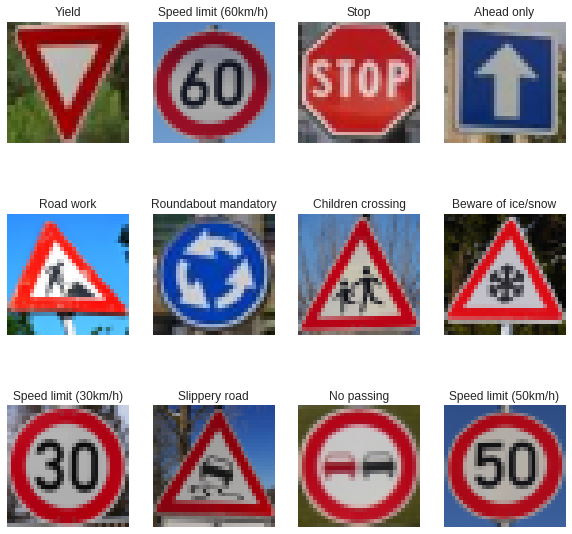

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def rgb(img):
    """Convert from 4 channel color (RGBA) to 3 channel color (RGB)"""
    return cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

def resize(img, pixel):
    """Resize image and keep aspect ratio"""
    r = pixel / img.shape[1]
    dim = (pixel, int(img.shape[0] * r))
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

path = "extra_signs/"
dirs = os.listdir(path)
extra_signs = []
extra_signs_label = []

#plotting traffic sign images
fig, sign = plt.subplots(nrows=3, ncols=4, figsize=(10,10));
sign = sign.ravel() #Return a contiguous flattened array.
i = 1

for file in dirs:
    test_img = path + file   
    image = mpimg.imread(test_img)
    image = rgb(image)
    image = resize(image, 32)    
    #print('This image is:', type(image), 'with dimesions:', image.shape)
    extra_signs.append(image)
    pos = file.find("_")
    label = int(file[:pos])
    extra_signs_label.append(label)

    sign[i-1].imshow(image)
    sign[i-1].set_title(signname[label])
    sign[i-1].axes.get_xaxis().set_visible(False)
    sign[i-1].axes.get_yaxis().set_visible(False)        
    i += 1
    #plt.tight_layout()

extra_signs_org = np.array(extra_signs)
extra_signs_label = np.array(extra_signs_label)
print('New images are:',extra_signs_org.shape[1:])


### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from IPython.display import display, Markdown

#Normalize
extra_signs = normalize(extra_signs_org)

#Prediction
classes = tf.argmax(input=logits, axis=1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) #always restore session
    predicted_classes = sess.run(classes, feed_dict={x: extra_signs, keep_prob: 1.0})

 
    
i=0
print("|Actual Image | Prediction |")
print("|:--:|:--:|")
for p in predicted_classes:
    print("|",signname[extra_signs_label[i]],"|",signname[p],"|")   
    i+=1


|Actual Image | Prediction |
|:--:|:--:|
| Yield | Yield |
| Speed limit (60km/h) | Speed limit (60km/h) |
| Stop | Stop |
| Ahead only | Ahead only |
| Road work | Road work |
| Roundabout mandatory | Roundabout mandatory |
| Children crossing | Children crossing |
| Beware of ice/snow | Beware of ice/snow |
| Speed limit (30km/h) | Speed limit (30km/h) |
| Slippery road | Slippery road |
| No passing | No passing |
| Speed limit (50km/h) | Speed limit (50km/h) |


|Actual Image | Prediction |
|:--:|:--:|
| Yield | Yield |
| Speed limit (60km/h) | Speed limit (60km/h) |
| Stop | Stop |
| Ahead only | Ahead only |
| Road work | Road work |
| Roundabout mandatory | Roundabout mandatory |
| Children crossing | Children crossing |
| Beware of ice/snow | Beware of ice/snow |
| Speed limit (30km/h) | Speed limit (30km/h) |
| Slippery road | Slippery road |
| No passing | No passing |
| Speed limit (50km/h) | Speed limit (50km/h) |

### Analyze Performance & Output Top 5 Softmax Probabilities

Test Accuracy = 1.000


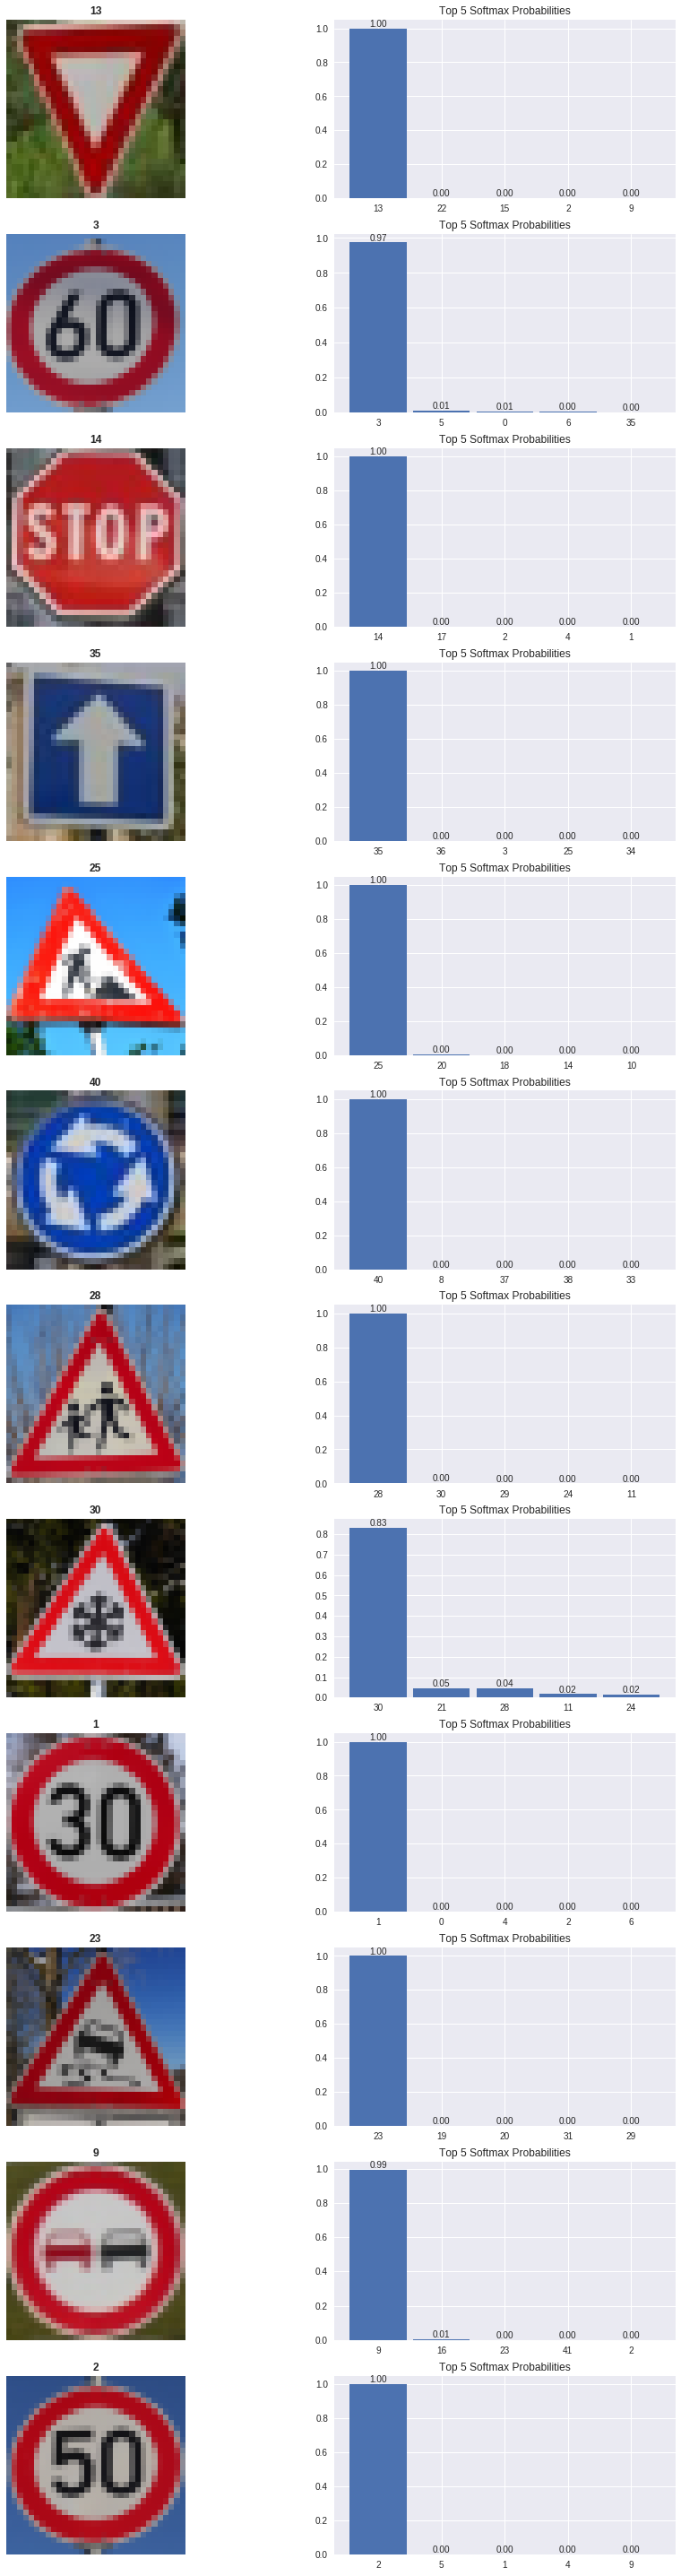

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(extra_signs, extra_signs_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
probabilities = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) #always restore session
    softmax_probabilities = sess.run(probabilities, feed_dict={x: extra_signs, keep_prob: 1.0})
    top5 = sess.run(tf.nn.top_k(softmax_probabilities, k=5, sorted=True))

top5 = np.array(top5)

### Top 5 Softmax Probabilities For Each Image
fig, sign = plt.subplots(nrows=12, ncols=2, figsize=(15,52));
sign = sign.ravel() #Return a contiguous flattened array.

k = 0
for i in range(0,len(sign),2):
    ### Load Image
    sign[i].imshow(extra_signs_org[k])
    sign[i].axes.get_xaxis().set_visible(False)
    sign[i].axes.get_yaxis().set_visible(False)        
    font_parameter = {'fontweight' : 'bold','fontsize':'large'}
    sign[i].set_title(extra_signs_label[k],fontdict=font_parameter)

    ### Plot Top 5 Softmax
    yy = top5[0][k]
    N = len(yy)
    xx = range(N)
    labels = [0]    
    for l in top5[1][k]:
        label = int(l)
        labels.append(label)
        #labels.append(signname[label])
    width = 0.9
    sign[i+1].bar(xx, yy, width)  
    sign[i+1].axes.set_xticklabels(labels,rotation='horizontal')
    sign[i+1].set_title('Top 5 Softmax Probabilities')
    for xy in zip(xx, yy):
        sign[i+1].annotate('%.2f' % xy[1], xy=xy, textcoords='data',horizontalalignment='center',verticalalignment='bottom') # <--
    k += 1



### Precision/Recall

Here the probability confidence threshold > 0.9 

Benchmarking my CNN based Softmax Probabilities

| | Actual True| Actual False|
|:-------------: |:-------------:| :-----:|
| Predicted True| 11         | 0  |
| Predicted False| 1 | 0 |

#### Precision = 1

#### Recall = 0.9166

#### F1 Score = 0.9550



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### References:
    https://www.tensorflow.org/
    http://cs231n.github.io/neural-networks-2/
    http://neuralnetworksanddeeplearning.com/chap3.html
    https://www.coursera.org/learn/machine-learning
    https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 